# Plot hydrogen wavefunctions
Code adapted from https://www.hasenkopf2000.net/wiki/page/3d-hydrogen-structure-python/


In [1]:
import numpy
import scipy.special
import scipy.misc
#from enthought.mayavi import mlab

In [8]:
import matplotlib.pyplot as plt

In [2]:
r = lambda x,y,z: numpy.sqrt(x**2+y**2+z**2)
theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))
phi = lambda x,y,z: numpy.arctan2(y,x)

In [3]:
a0 = 1.

In [4]:
# Note: R is not normalized
R = lambda r,n,l: (2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)
absWF = lambda r,theta,phi,n,l,m: abs(WF(r,theta,phi,n,l,m))**2

In [5]:
size=10
shift=0.00
x,z = numpy.ogrid[-size+shift:size+shift:105j,-size+shift:size+shift:105j]

In [20]:
psi = lambda x, y, z, n=1, l=0, m=0: WF(r(x,y,z),theta(x,y,z),phi(x,y,z),n,l,m)

<ipython-input-2-ed742e276c7c>:2: RuntimeWarning: invalid value encountered in true_divide
  theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))


Text(0, 0.5, 'z')

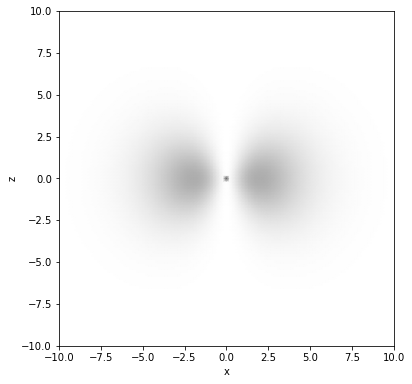

In [38]:
plt.figure(figsize=(6,8))
toplot = -numpy.abs(psi(x,0*x,z,2,1,1)-0*psi(x,0*x,z,2,1,0))**2
zmax = 0.2# numpy.abs(toplot).flatten().max()
plt.pcolormesh(numpy.linspace(-size+shift,size+shift,105),numpy.linspace(-size+shift,size+shift,105),toplot.squeeze().T,cmap="gist_gray",vmin=-zmax,vmax=0*zmax,shading='gouraud')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('z')

In [ ]:
numpy.abs(psi(x,y,0*x)).flatten().max()

In [10]:
toplot.squeeze().shape

(105, 105)

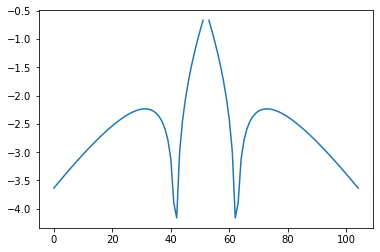

In [16]:
plt.plot(numpy.log10(numpy.abs(toplot[:,52])))

In [22]:
import scipy.integrate

How much is the center of charge shifted in the superposition state?
$$
\langle z \rangle = \iiint \psi^*(r,\theta,\phi) (r \cos \theta) \psi(r,\theta,\phi)\,r^2\sin\theta\,dr\,d\theta\,d\phi
$$

In [34]:
scipy.integrate.tplquad(lambda r, θ, ϕ: r*numpy.cos(θ)*numpy.abs(WF(r,θ,ϕ,2,0,0)+WF(r,θ,ϕ,2,1,0))**2*r**2*numpy.sin(θ), 0, 2*numpy.pi, 0, numpy.pi, 0, numpy.infty)[0]/ \
scipy.integrate.tplquad(lambda r, θ, ϕ: numpy.abs(WF(r,θ,ϕ,2,0,0)+WF(r,θ,ϕ,2,1,0))**2*r**2*numpy.sin(θ), 0, 2*numpy.pi, 0, numpy.pi, 0, numpy.infty)[0]

-2.598076211353328

In [37]:
scipy.integrate.tplquad(lambda r, θ, ϕ: numpy.abs(WF(r,θ,ϕ,3,0,0))**2*r**2*numpy.sin(θ), 0, 2*numpy.pi, 0, numpy.pi, 0, numpy.infty)

(60.74999999999998, 2.975832220691516e-08)